In [192]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
df = pd.read_csv(r"C:\Users\ramee\OneDrive\Desktop\ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [194]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# define categorical and numerical groups
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 
                    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 
                    'FCVC', 'FAF', 'TUE']

numeric_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O']

# one-hot encode categorical
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded = pd.DataFrame(ohe.fit_transform(df[categorical_cols]), 
                       columns=ohe.get_feature_names_out(categorical_cols))

# scale numeric
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# combine both
X = pd.concat([scaled, encoded], axis=1)


c:\Users\ramee\miniconda3\envs\dsi_participant\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


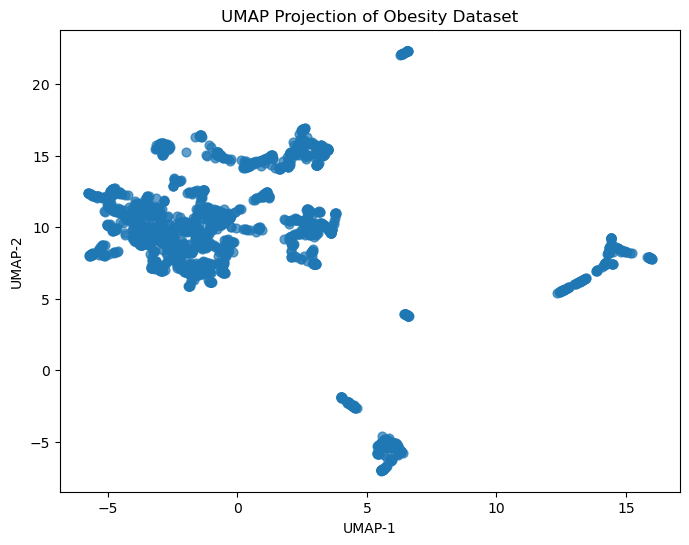

In [195]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Initialize UMAP
umap_reducer = umap.UMAP(
    n_neighbors=15,      # how many points influence each point’s embedding
    min_dist=0.1,        # how tightly packed the embedding is
    n_components=2,      # we want 2D visualization
    random_state=42
)

# Fit and transform
X_umap = umap_reducer.fit_transform(X)

# Plot UMAP projection
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:,0], X_umap[:,1], s=40, alpha=0.7)
plt.title("UMAP Projection of Obesity Dataset")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()


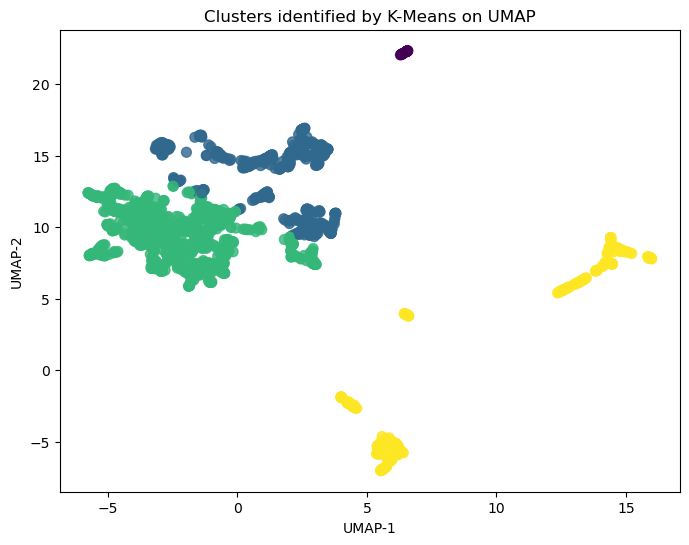

In [196]:
from sklearn.cluster import KMeans

# try different k values (e.g., 2–8)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_umap)

# visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:,0], X_umap[:,1], c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.title("Clusters identified by K-Means on UMAP")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()


In [197]:
#!pip install kmodes


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11, ncost: 174572.87786588236
Run: 1, iteration: 2/100, moves: 4, ncost: 174566.75448425818
Run: 1, iteration: 3/100, moves: 2, ncost: 174565.58920249238
Run: 1, iteration: 4/100, moves: 0, ncost: 174565.58920249238
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 414, ncost: 134397.78398012137
Run: 2, iteration: 2/100, moves: 46, ncost: 133518.69615180002
Run: 2, iteration: 3/100, moves: 14, ncost: 133442.66247671365
Run: 2, iteration: 4/100, moves: 1, ncost: 133442.11426250127
Run: 2, iteration: 5/100, moves: 0, ncost: 133442.11426250127
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 566, ncost: 173798.17802980728
Run: 3, iteration: 2/100, moves: 62, ncost: 173195.221449

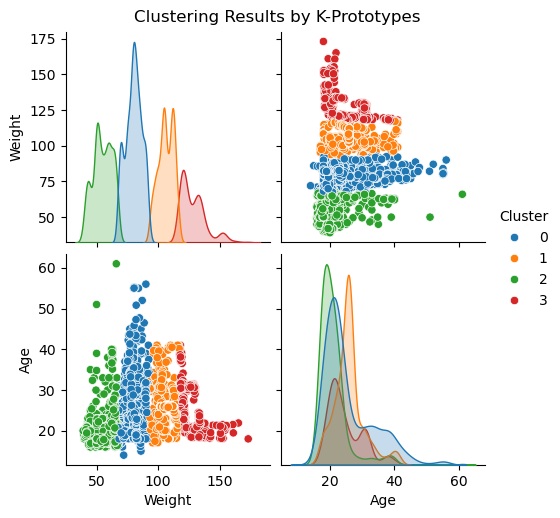


Cluster vs True Labels:

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Cluster                                                          
0                             0             82             184   
1                             0              0             160   
2                           272            205               0   
3                             0              0               7   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Cluster                                                             
0                         0                 0                 231   
1                       137               180                   0   
2                         0                 0                  59   
3                       160               144                   0   

NObeyesdad  Overweight_Level_II  
Cluster                          
0                           239  
1                            28  
2                         

In [198]:
# ------------------------------------------
# 1️⃣ Import Required Libraries
# ------------------------------------------
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# ------------------------------------------
# 3️⃣ Identify Feature Types
# ------------------------------------------
categorical_cols = [
    'Gender', 
    'family_history_with_overweight', 
    'FAVC', 
    'CAEC', 
    'SMOKE', 
    'SCC', 
    'CALC', 
    'MTRANS'
]

numeric_cols = [
    'Age', 
    #'Height', 
    #'Weight', 
    'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'
]

target_col = 'NObeyesdad'  # target (not used in unsupervised clustering)

# ------------------------------------------
# 4️⃣ Handle Data Types
# ------------------------------------------
# Convert categorical to string (required for KPrototypes)
df[categorical_cols] = df[categorical_cols].astype(str)

# Convert numeric to float (ensure consistent dtype)
df[numeric_cols] = df[numeric_cols].astype(float)

# Drop target column for clustering
X = df.drop(columns=[target_col], errors='ignore')

# ------------------------------------------
# 5️⃣ Scale Numeric Features
# ------------------------------------------
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# ------------------------------------------
# 6️⃣ Apply K-Prototypes Clustering
# ------------------------------------------
# K-Prototypes needs categorical feature indices (by column index)
cat_col_idx = [X.columns.get_loc(col) for col in categorical_cols]

kproto = KPrototypes(n_clusters=4, random_state=42, init='Cao', n_init=5, verbose=1)
clusters = kproto.fit_predict(X, categorical=cat_col_idx)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# ------------------------------------------
# 7️⃣ Cluster Summary
# ------------------------------------------
cluster_summary = df.groupby('Cluster')[numeric_cols].mean().round(2)
print("\n📊 Cluster Summary (Numeric Features):\n")
print(cluster_summary)

# For categorical columns, see mode (most common value)
cat_summary = df.groupby('Cluster')[categorical_cols].agg(lambda x: x.value_counts().index[0])
print("\n📋 Cluster Summary (Categorical Features):\n")
print(cat_summary)

# ------------------------------------------
# 8️⃣ Visualize Clusters
# ------------------------------------------
# Reduce to two numeric features for simple visualization
sns.pairplot(df, vars=['Weight', 'Age'], hue='Cluster', palette='tab10')
plt.suptitle('Clustering Results by K-Prototypes', y=1.02)
plt.show()

# ------------------------------------------
# 9️⃣ Optional: Compare Clusters with True Labels
# ------------------------------------------
if target_col in df.columns:
    print("\nCluster vs True Labels:\n")
    print(pd.crosstab(df['Cluster'], df[target_col]))



Cluster Summary (Numerical):
          Age   NCP  CH2O   FAF
Cluster                        
0       -0.49  0.53  0.42  0.90
1       -0.37 -1.91 -0.14 -0.31
2        1.70 -0.02 -0.23 -0.07
3       -0.29  0.42 -0.23 -0.75

Cluster Summary (Categorical):

Gender distribution:
Gender      0     1
Cluster            
0        0.39  0.61
1        0.58  0.42
2        0.36  0.64
3        0.64  0.36

family_history_with_overweight distribution:
family_history_with_overweight     0     1
Cluster                                   
0                               0.19  0.81
1                               0.33  0.67
2                               0.07  0.93
3                               0.17  0.83

FAVC distribution:
FAVC        0     1
Cluster            
0        0.15  0.85
1        0.14  0.86
2        0.08  0.92
3        0.09  0.91

FCVC distribution:
FCVC      0    1    2    3    4    5    6    7    8    9    ...  800  801  \
Cluster                                                     ...

c:\Users\ramee\miniconda3\envs\dsi_participant\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


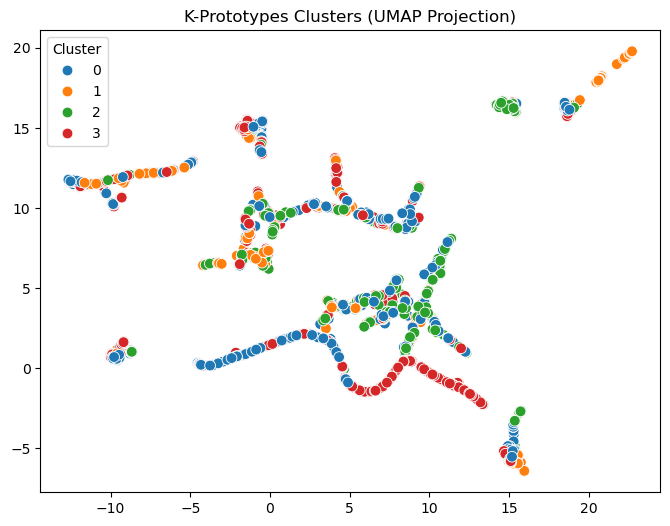

In [199]:
# ----------------------------------------
# 1️⃣ Import Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from kmodes.kprototypes import KPrototypes
import seaborn as sns
import matplotlib.pyplot as plt
import umap


# ----------------------------------------
# 3️⃣ Identify Feature Types
# ----------------------------------------
# Numerical: Continuous, quantitative values
num_cols = ['Age', 
            #'Height', 
            #'Weight', 
            'NCP', 'CH2O','FAF']

# Categorical: Includes binary, nominal, AND ordinal frequency-type features
cat_cols = [
    'Gender', 'family_history_with_overweight', 'FAVC',
    'FCVC', 'CAEC', 'SMOKE', 'SCC', 'TUE', 'CALC', 'MTRANS'
]

# ----------------------------------------
# 4️⃣ Label Encode Categorical Variables
# ----------------------------------------
# LabelEncoder works since K-Prototypes expects integer-coded categories
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# ----------------------------------------
# 5️⃣ Scale Numerical Columns
# ----------------------------------------
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# ----------------------------------------
# 6️⃣ Prepare Data for Clustering
# ----------------------------------------
X = df[num_cols + cat_cols]

# Identify categorical column indices for K-Prototypes
cat_col_idx = [X.columns.get_loc(col) for col in cat_cols]

# ----------------------------------------
# 7️⃣ Apply K-Prototypes Clustering
# ----------------------------------------
kproto = KPrototypes(n_clusters=4, init='Cao', random_state=42)
clusters = kproto.fit_predict(X, categorical=cat_col_idx)

# Assign clusters
df['Cluster'] = clusters

# ----------------------------------------
# 8️⃣ Analyze Cluster Characteristics
# ----------------------------------------
print("\nCluster Summary (Numerical):")
print(df.groupby('Cluster')[num_cols].mean().round(2))

print("\nCluster Summary (Categorical):")
for col in cat_cols:
    print(f"\n{col} distribution:")
    print(df.groupby('Cluster')[col].value_counts(normalize=True)
          .unstack().fillna(0).round(2))

# ----------------------------------------
# 9️⃣ Visualize with UMAP (Optional but Recommended)
# ----------------------------------------
# UMAP helps visualize high-dimensional cluster structure
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
embedding = reducer.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1],
                hue=df['Cluster'], palette='tab10', s=60)
plt.title("K-Prototypes Clusters (UMAP Projection)")
plt.show()


K=2, cost=9742.96
K=3, cost=8323.11
K=4, cost=7192.72
K=5, cost=6539.39
K=6, cost=6212.60
K=7, cost=5907.69
K=8, cost=5671.50


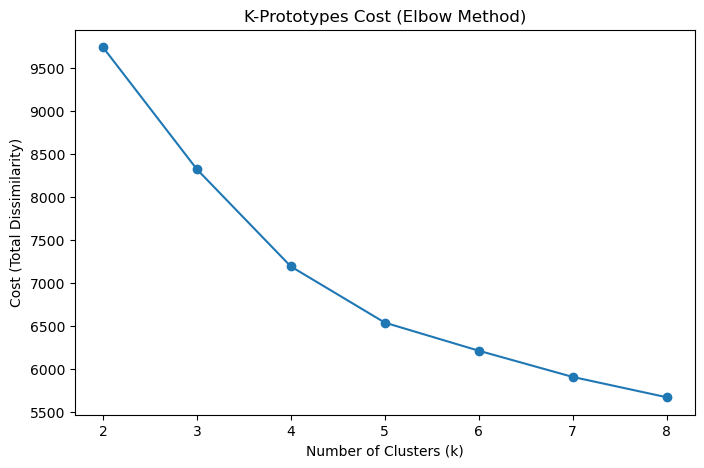

In [200]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

costs = []
K = range(2, 9)  # try cluster counts from 2 to 8

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    kproto.fit_predict(X, categorical=cat_col_idx)
    costs.append(kproto.cost_)
    print(f'K={k}, cost={kproto.cost_:.2f}')

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, costs, marker='o')
plt.title('K-Prototypes Cost (Elbow Method)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Total Dissimilarity)')
plt.show()


In [201]:
# Summarize numerical features by cluster
num_summary = df.groupby('Cluster')[num_cols].mean().round(2)
print("📊 Numerical Feature Averages by Cluster:")
print(num_summary)


📊 Numerical Feature Averages by Cluster:
          Age   NCP  CH2O   FAF
Cluster                        
0       -0.49  0.53  0.42  0.90
1       -0.37 -1.91 -0.14 -0.31
2        1.70 -0.02 -0.23 -0.07
3       -0.29  0.42 -0.23 -0.75


In [202]:
print("\n📈 Categorical Feature Distributions by Cluster:")

for col in cat_cols:
    crosstab = (
        df.groupby('Cluster')[col]
          .value_counts(normalize=True)
          .unstack()
          .fillna(0)
          .round(2)
    )
    print(f"\n{col}:\n{crosstab}")



📈 Categorical Feature Distributions by Cluster:

Gender:
Gender      0     1
Cluster            
0        0.39  0.61
1        0.58  0.42
2        0.36  0.64
3        0.64  0.36

family_history_with_overweight:
family_history_with_overweight     0     1
Cluster                                   
0                               0.19  0.81
1                               0.33  0.67
2                               0.07  0.93
3                               0.17  0.83

FAVC:
FAVC        0     1
Cluster            
0        0.15  0.85
1        0.14  0.86
2        0.08  0.92
3        0.09  0.91

FCVC:
FCVC      0    1    2    3    4    5    6    7    8    9    ...  800  801  \
Cluster                                                     ...             
0        0.02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1        0.01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2        0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3        0.0

In [203]:
overall_means = df[num_cols].mean()
diff = num_summary - overall_means

print("\n Top Differentiating Numeric Features by Cluster:")
for c in diff.index:
    top_feats = diff.loc[c].abs().sort_values(ascending=False).head(3)
    print(f"Cluster {c}: {list(top_feats.index)} (most distinct)")



 Top Differentiating Numeric Features by Cluster:
Cluster 0: ['FAF', 'NCP', 'Age'] (most distinct)
Cluster 1: ['NCP', 'Age', 'FAF'] (most distinct)
Cluster 2: ['Age', 'CH2O', 'FAF'] (most distinct)
Cluster 3: ['FAF', 'NCP', 'Age'] (most distinct)


In [204]:
print("\n Dominant Categories per Cluster:")
for c in df['Cluster'].unique():
    print(f"\nCluster {c}:")
    for col in cat_cols:
        mode_val = df.loc[df['Cluster']==c, col].mode()[0]
        print(f"  {col}: {mode_val}")



 Dominant Categories per Cluster:

Cluster 3:
  Gender: 0
  family_history_with_overweight: 1
  FAVC: 1
  FCVC: 809
  CAEC: 2
  SMOKE: 0
  SCC: 0
  TUE: 839
  CALC: 2
  MTRANS: 3

Cluster 0:
  Gender: 1
  family_history_with_overweight: 1
  FAVC: 1
  FCVC: 809
  CAEC: 2
  SMOKE: 0
  SCC: 0
  TUE: 0
  CALC: 2
  MTRANS: 3

Cluster 1:
  Gender: 0
  family_history_with_overweight: 1
  FAVC: 1
  FCVC: 170
  CAEC: 2
  SMOKE: 0
  SCC: 0
  TUE: 0
  CALC: 2
  MTRANS: 3

Cluster 2:
  Gender: 1
  family_history_with_overweight: 1
  FAVC: 1
  FCVC: 170
  CAEC: 2
  SMOKE: 0
  SCC: 0
  TUE: 0
  CALC: 2
  MTRANS: 0


In [205]:
def describe_cluster(c):
    row = num_summary.loc[c]
    print(f"\n Cluster {c} Summary:")
    #print(f"- Avg Age: {row['Age']:.1f}, Avg Weight: {row['Weight']:.1f} kg")
    print(f"- Avg Physical Activity (FAF): {row.get('FAF', np.nan):.1f}")
    print(f"- Avg Tech Usage (TUE): {row.get('TUE', np.nan):.1f}")
    top_feats = diff.loc[c].abs().sort_values(ascending=False).head(3)
    print(f"- Distinguishing features: {list(top_feats.index)}")


In [206]:
for c in df['Cluster'].unique():
    describe_cluster(c)



 Cluster 3 Summary:
- Avg Physical Activity (FAF): -0.8
- Avg Tech Usage (TUE): nan
- Distinguishing features: ['FAF', 'NCP', 'Age']

 Cluster 0 Summary:
- Avg Physical Activity (FAF): 0.9
- Avg Tech Usage (TUE): nan
- Distinguishing features: ['FAF', 'NCP', 'Age']

 Cluster 1 Summary:
- Avg Physical Activity (FAF): -0.3
- Avg Tech Usage (TUE): nan
- Distinguishing features: ['NCP', 'Age', 'FAF']

 Cluster 2 Summary:
- Avg Physical Activity (FAF): -0.1
- Avg Tech Usage (TUE): nan
- Distinguishing features: ['Age', 'CH2O', 'FAF']


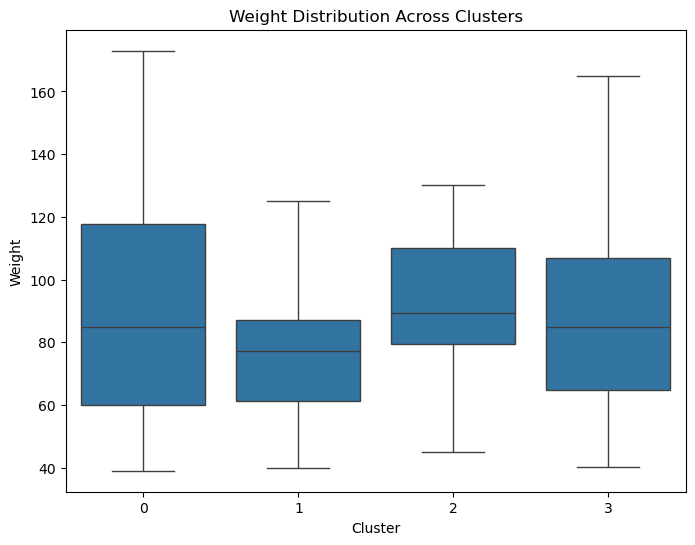

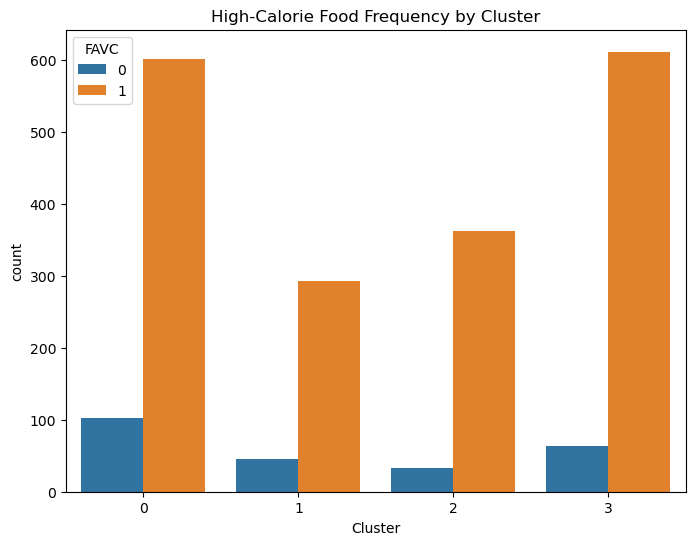

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Cluster', y='Weight', data=df)
plt.title("Weight Distribution Across Clusters")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='Cluster', hue='FAVC', data=df)
plt.title("High-Calorie Food Frequency by Cluster")
plt.show()


In [208]:
import pandas as pd
import numpy as np

def generate_cluster_report(df, num_cols, cat_cols, cluster_col='Cluster'):
    clusters = sorted(df[cluster_col].unique())
    report_rows = []

    # Step 1 — Overall averages (for numeric comparison)
    overall_means = df[num_cols].mean()

    for c in clusters:
        cluster_data = df[df[cluster_col] == c]

        # --- Cluster size ---
        size = len(cluster_data)
        pct = round(100 * size / len(df), 2)

        # --- Numeric summaries ---
        num_summary = cluster_data[num_cols].mean().round(2)
        diff = (num_summary - overall_means).round(2)
        top_diff_feats = diff.abs().sort_values(ascending=False).head(3)
        top_num_features = ', '.join(top_diff_feats.index)

        # --- Dominant categories ---
        dominant_cats = {}
        for col in cat_cols:
            dominant_cats[col] = cluster_data[col].mode()[0]

        top_cat_features = ', '.join([f"{k}={v}" for k, v in list(dominant_cats.items())[:3]])

        # --- Build summary row ---
        report_rows.append({
            'Cluster': c,
            'Size': size,
            'Percent of Data (%)': pct,
            'Top Numeric Differentiators': top_num_features,
            'Dominant Categories': top_cat_features,
            'Avg Age': num_summary.get('Age', np.nan),
            'Avg Weight': num_summary.get('Weight', np.nan),
            'Avg Height': num_summary.get('Height', np.nan),
            'Avg Physical Activity (FAF)': num_summary.get('FAF', np.nan),
        })

    # Step 2 — Convert to DataFrame
    report_df = pd.DataFrame(report_rows)
    report_df = report_df.sort_values(by='Size', ascending=False).reset_index(drop=True)
    return report_df


# --- Run the report generator ---
report = generate_cluster_report(df, num_cols, cat_cols, cluster_col='Cluster')

print("📋 Cluster Insights Report:")
print(report)


📋 Cluster Insights Report:
   Cluster  Size  Percent of Data (%) Top Numeric Differentiators  \
0        0   704                33.35               FAF, NCP, Age   
1        3   674                31.93               FAF, NCP, Age   
2        2   395                18.71              Age, CH2O, FAF   
3        1   338                16.01               NCP, Age, FAF   

                                  Dominant Categories  Avg Age  Avg Weight  \
0  Gender=1, family_history_with_overweight=1, FAVC=1    -0.49         NaN   
1  Gender=0, family_history_with_overweight=1, FAVC=1    -0.29         NaN   
2  Gender=1, family_history_with_overweight=1, FAVC=1     1.70         NaN   
3  Gender=0, family_history_with_overweight=1, FAVC=1    -0.37         NaN   

   Avg Height  Avg Physical Activity (FAF)  
0         NaN                         0.90  
1         NaN                        -0.75  
2         NaN                        -0.07  
3         NaN                        -0.31  


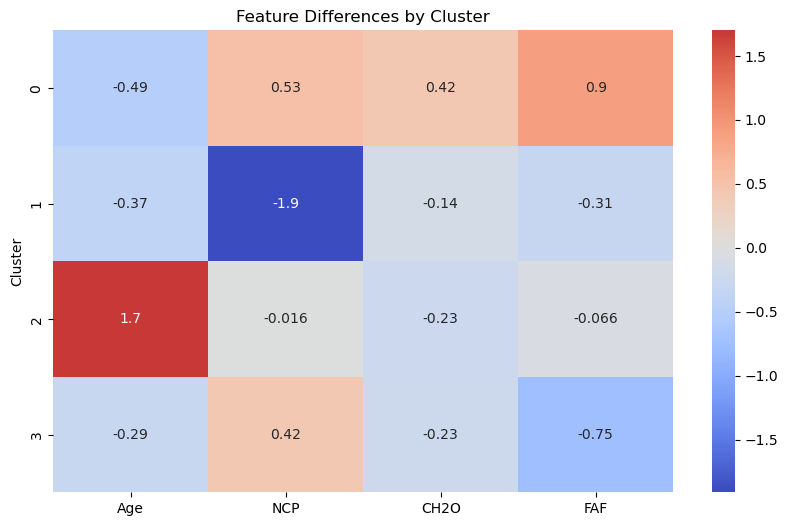

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

num_summary = df.groupby('Cluster')[num_cols].mean()
diff = num_summary - df[num_cols].mean()

plt.figure(figsize=(10,6))
sns.heatmap(diff, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Differences by Cluster")
plt.show()


In [210]:
import pandas as pd
import numpy as np

def generate_cluster_report_with_summary(df, num_cols, cat_cols, cluster_col='Cluster'):
    clusters = sorted(df[cluster_col].unique())
    report_rows = []

    overall_means = df[num_cols].mean()

    for c in clusters:
        cluster_data = df[df[cluster_col] == c]
        size = len(cluster_data)
        pct = round(100 * size / len(df), 2)

        # --- Numeric summaries ---
        num_summary = cluster_data[num_cols].mean().round(2)
        diff = (num_summary - overall_means).round(2)
        top_diff_feats = diff.abs().sort_values(ascending=False).head(3)
        top_num_features = ', '.join(top_diff_feats.index)

        # --- Dominant categorical features ---
        dominant_cats = {}
        cat_story_parts = []
        for col in cat_cols:
            mode_val = cluster_data[col].mode()[0]
            freq = (cluster_data[col] == mode_val).mean() * 100
            dominant_cats[col] = f"{mode_val} ({freq:.1f}%)"
            if freq > 60:  # only mention strong patterns
                cat_story_parts.append(f"{col}={mode_val}")

        # --- Natural-language summary ---
        cat_story = ', '.join(cat_story_parts[:4]) if cat_story_parts else "mixed characteristics"
        summary_text = (
            f"Cluster {c}: {size} people ({pct}%). "
            f"Distinct in {top_num_features}. "
            f"Mostly shows {cat_story}."
        )

        # --- Build summary row ---
        report_rows.append({
            'Cluster': c,
            'Size': size,
            'Percent of Data (%)': pct,
            'Top Numeric Differentiators': top_num_features,
            'Top Categorical Modes': ', '.join([f"{k}={v}" for k, v in dominant_cats.items()][:4]),
            'Avg Age': num_summary.get('Age', np.nan),
            'Avg Weight': num_summary.get('Weight', np.nan),
            'Avg Height': num_summary.get('Height', np.nan),
            'Avg Physical Activity (FAF)': num_summary.get('FAF', np.nan),
            'Cluster Summary': summary_text
        })

    report_df = pd.DataFrame(report_rows)
    report_df = report_df.sort_values(by='Size', ascending=False).reset_index(drop=True)
    return report_df


# --- Run it ---
report = generate_cluster_report_with_summary(df, num_cols, cat_cols, cluster_col='Cluster')

# View your detailed cluster insights
pd.set_option('display.max_colwidth', None)
print("📊 Enhanced Cluster Insights Report:")
print(report[['Cluster', 'Size', 'Percent of Data (%)', 'Cluster Summary']])


📊 Enhanced Cluster Insights Report:
   Cluster  Size  Percent of Data (%)  \
0        0   704                33.35   
1        3   674                31.93   
2        2   395                18.71   
3        1   338                16.01   

                                                                                                                        Cluster Summary  
0   Cluster 0: 704 people (33.35%). Distinct in FAF, NCP, Age. Mostly shows Gender=1, family_history_with_overweight=1, FAVC=1, CAEC=2.  
1   Cluster 3: 674 people (31.93%). Distinct in FAF, NCP, Age. Mostly shows Gender=0, family_history_with_overweight=1, FAVC=1, CAEC=2.  
2  Cluster 2: 395 people (18.71%). Distinct in Age, CH2O, FAF. Mostly shows Gender=1, family_history_with_overweight=1, FAVC=1, CAEC=2.  
3    Cluster 1: 338 people (16.01%). Distinct in NCP, Age, FAF. Mostly shows family_history_with_overweight=1, FAVC=1, CAEC=2, SMOKE=0.  


📊 Full Cluster Report with Labels:

   Cluster    Cluster Label  \
0        0  Mixed Lifestyle   
1        1  Mixed Lifestyle   
2        2  Mixed Lifestyle   
3        3  Mixed Lifestyle   

                                                                                                                        Cluster Summary  
0   Cluster 0: 704 people (33.35%). Distinct in FAF, NCP, Age. Mostly shows Gender=1, family_history_with_overweight=1, FAVC=1, CAEC=2.  
1    Cluster 1: 338 people (16.01%). Distinct in NCP, Age, FAF. Mostly shows family_history_with_overweight=1, FAVC=1, CAEC=2, SMOKE=0.  
2  Cluster 2: 395 people (18.71%). Distinct in Age, CH2O, FAF. Mostly shows Gender=1, family_history_with_overweight=1, FAVC=1, CAEC=2.  
3   Cluster 3: 674 people (31.93%). Distinct in FAF, NCP, Age. Mostly shows Gender=0, family_history_with_overweight=1, FAVC=1, CAEC=2.  


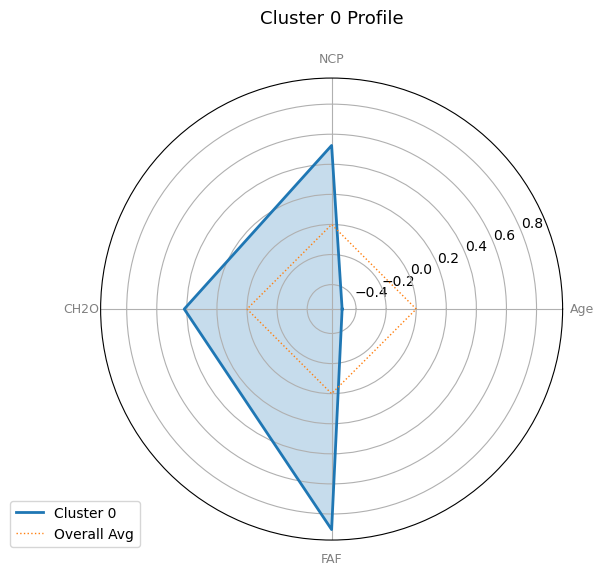

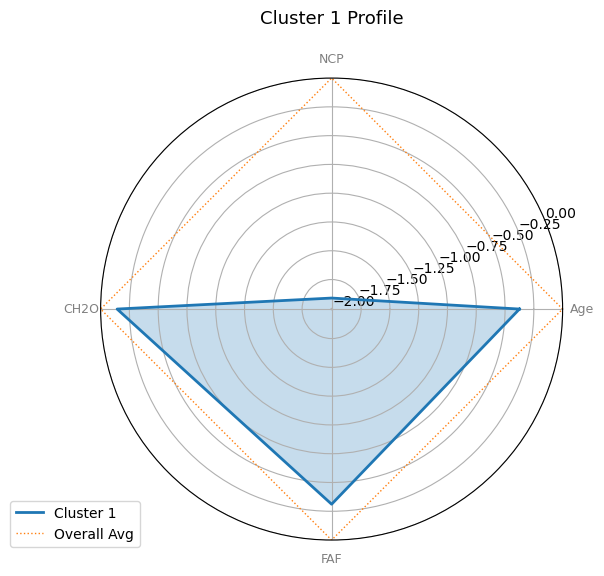

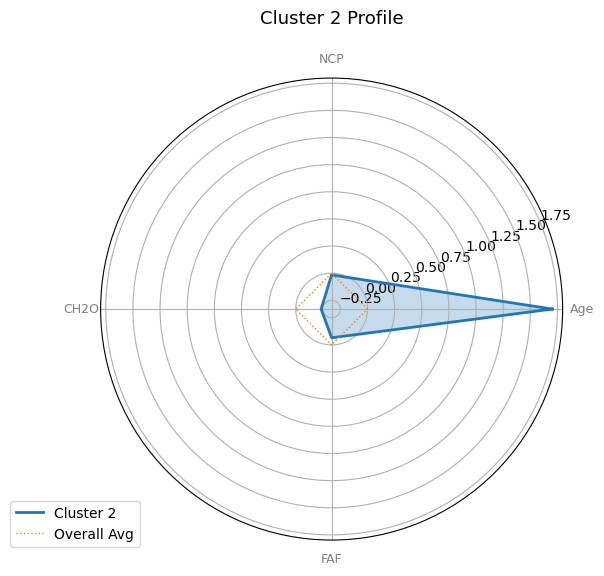

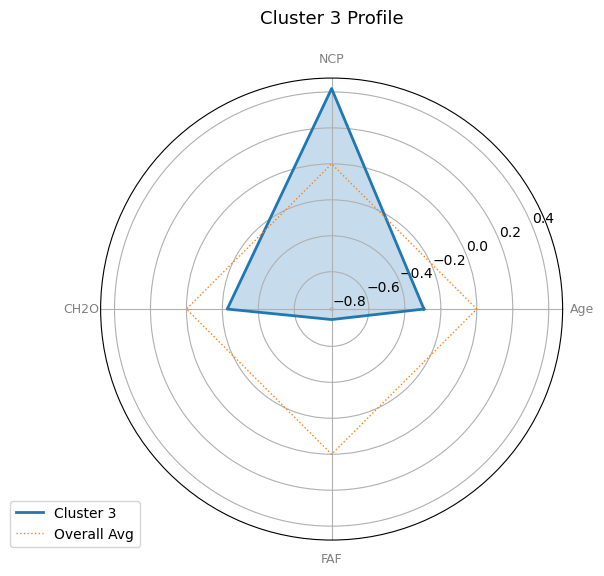

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# --- Step 1: Labeling logic ---
def label_cluster(row):
    summary = row['Cluster Summary'].lower()

    if "favc=yes" in summary and "faf" in summary and "low" not in summary:
        return "High Calorie, Active"
    elif "favc=yes" in summary and "faf" not in summary:
        return "High Calorie, Low Activity"
    elif "favc=no" in summary and "faf" in summary:
        return "Health Conscious"
    elif "smoke=yes" in summary:
        return "Smoker Group"
    elif "calc=frequently" in summary:
        return "Frequent Alcohol"
    elif "fcvc=3" in summary and "faf" in summary:
        return "Vegetable & Active"
    else:
        return "Mixed Lifestyle"


# --- Step 2: Enhanced report generator with labeling ---
def generate_cluster_report_with_labels(df, num_cols, cat_cols, cluster_col='Cluster'):
    clusters = sorted(df[cluster_col].unique())
    overall_means = df[num_cols].mean()
    report_rows = []

    for c in clusters:
        cluster_data = df[df[cluster_col] == c]
        size = len(cluster_data)
        pct = round(100 * size / len(df), 2)

        num_summary = cluster_data[num_cols].mean().round(2)
        diff = (num_summary - overall_means).round(2)
        top_diff_feats = diff.abs().sort_values(ascending=False).head(3)
        top_num_features = ', '.join(top_diff_feats.index)

        dominant_cats = {}
        cat_story_parts = []
        for col in cat_cols:
            mode_val = cluster_data[col].mode()[0]
            freq = (cluster_data[col] == mode_val).mean() * 100
            dominant_cats[col] = f"{mode_val} ({freq:.1f}%)"
            if freq > 60:
                cat_story_parts.append(f"{col}={mode_val}")

        cat_story = ', '.join(cat_story_parts[:4]) if cat_story_parts else "mixed characteristics"
        summary_text = (
            f"Cluster {c}: {size} people ({pct}%). "
            f"Distinct in {top_num_features}. "
            f"Mostly shows {cat_story}."
        )

        report_rows.append({
            'Cluster': c,
            'Size': size,
            'Percent of Data (%)': pct,
            'Top Numeric Differentiators': top_num_features,
            'Top Categorical Modes': ', '.join([f"{k}={v}" for k, v in dominant_cats.items()][:4]),
            'Cluster Summary': summary_text,
            'Avg Age': num_summary.get('Age', np.nan),
            'Avg Weight': num_summary.get('Weight', np.nan),
            'Avg Height': num_summary.get('Height', np.nan),
            'Avg FAF': num_summary.get('FAF', np.nan)
        })

    report_df = pd.DataFrame(report_rows)
    report_df['Cluster Label'] = report_df.apply(label_cluster, axis=1)
    return report_df


# --- Step 3: Radar Chart Visualization ---
def plot_cluster_radar(df, num_cols, cluster_col='Cluster'):
    cluster_means = df.groupby(cluster_col)[num_cols].mean()
    overall_means = df[num_cols].mean()

    for cluster in cluster_means.index:
        cluster_values = cluster_means.loc[cluster].values
        overall_values = overall_means.values

        categories = num_cols
        N = len(categories)

        cluster_values = np.concatenate((cluster_values, [cluster_values[0]]))
        overall_values = np.concatenate((overall_values, [overall_values[0]]))
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        plt.figure(figsize=(6,6))
        ax = plt.subplot(111, polar=True)
        plt.xticks(angles[:-1], categories, color='grey', size=9)

        ax.plot(angles, cluster_values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
        ax.fill(angles, cluster_values, alpha=0.25)

        ax.plot(angles, overall_values, linewidth=1, linestyle='dotted', label='Overall Avg')
        plt.title(f"Cluster {cluster} Profile", size=13, y=1.1)
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.show()


# --- Run Everything ---
report = generate_cluster_report_with_labels(df, num_cols, cat_cols, cluster_col='Cluster')
pd.set_option('display.max_colwidth', None)
print("📊 Full Cluster Report with Labels:\n")
print(report[['Cluster', 'Cluster Label', 'Cluster Summary']])

# Plot radar charts
plot_cluster_radar(df, num_cols, cluster_col='Cluster')


In [212]:
# --- 3️⃣ Scale numeric columns ---
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[num_cols])
X_scaled = X_num_scaled  # store for reuse later

# --- 4️⃣ Combine scaled numerics + categorical (converted to object) ---
X_cat = df[cat_cols].astype(str)
X_combined = np.concatenate([X_num_scaled, X_cat], axis=1)

# --- 5️⃣ K-Prototypes clustering ---
kproto = KPrototypes(n_clusters=4, init='Cao', random_state=42)
clusters = kproto.fit_predict(X_combined, categorical=[i + len(num_cols) for i in range(len(cat_cols))])

df['Cluster'] = clusters

# --- 6️⃣ Compute scaled numeric feature means per cluster ---
scaled_df = pd.DataFrame(X_scaled, columns=num_cols)
scaled_df['Cluster'] = clusters
num_summary_scaled = scaled_df.groupby('Cluster')[num_cols].mean()

# --- 7️⃣ Inverse-scale cluster means properly ---
num_summary_original = pd.DataFrame(
    scaler.inverse_transform(num_summary_scaled),
    columns=num_cols,
    index=num_summary_scaled.index
)

# --- 8️⃣ Combine scaled + original summaries ---
comparison = pd.concat(
    [num_summary_scaled.add_suffix('_scaled'),
     num_summary_original.add_suffix('_orig')],
    axis=1
)

print("\n✅ Corrected Scaled vs Original (Realistic Values):")
print(comparison.round(2))


✅ Corrected Scaled vs Original (Realistic Values):
         Age_scaled  NCP_scaled  CH2O_scaled  FAF_scaled  Age_orig  NCP_orig  \
Cluster                                                                        
0             -0.49        0.53         0.42        0.90     -0.49      0.53   
1             -0.37       -1.91        -0.14       -0.31     -0.37     -1.91   
2              1.70       -0.02        -0.23       -0.07      1.70     -0.02   
3             -0.29        0.42        -0.23       -0.75     -0.29      0.42   

         CH2O_orig  FAF_orig  
Cluster                       
0             0.42      0.90  
1            -0.14     -0.31  
2            -0.23     -0.07  
3            -0.23     -0.75  
